In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_segmentation = pd.read_csv('Train.csv')
df_segmentation.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df_segmentation.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df_segmentation.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
df_segmentation.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

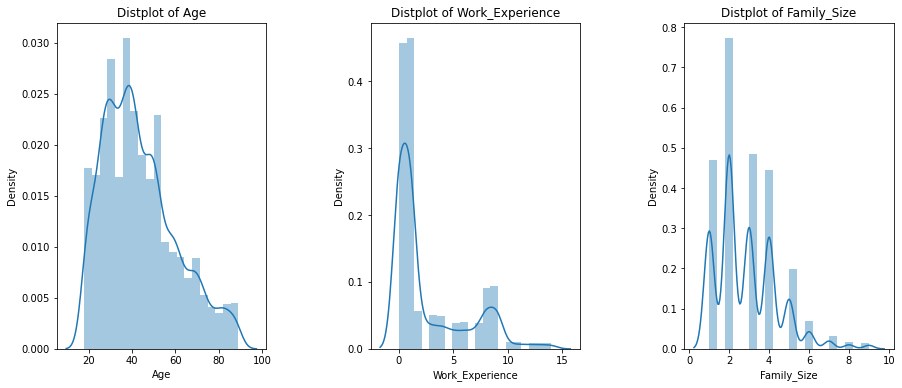

In [ ]:
plt.figure(1, figsize = (15,6))
n = 0
for x in ['Age', 'Work_Experience', 'Family_Size']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(df_segmentation[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

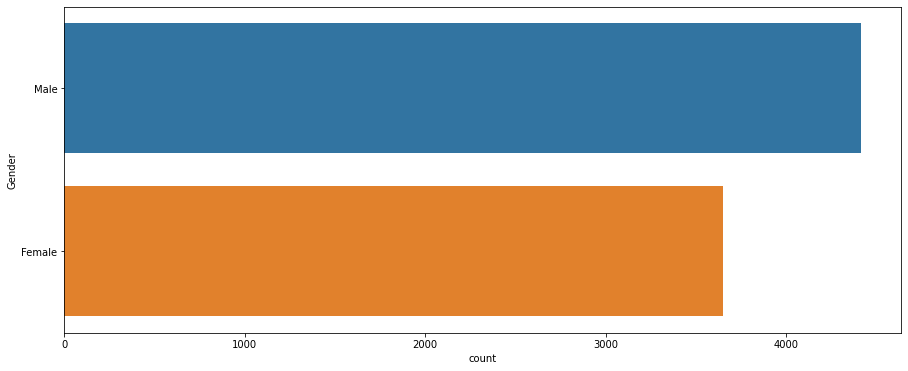

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(y='Gender', data=df_segmentation)
plt.show()

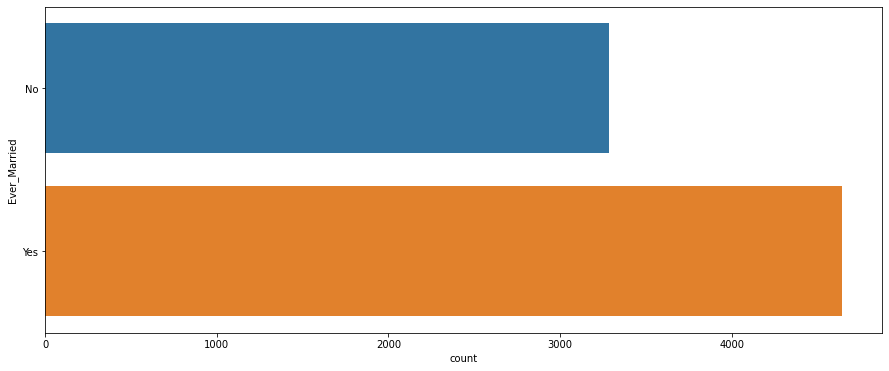

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(y='Ever_Married', data=df_segmentation)
plt.show()

In [ ]:
age_18_34 = df_segmentation[(df_segmentation['Age']>= 18) & (df_segmentation['Age'] <= 34)]
age_35_50 = df_segmentation[(df_segmentation['Age']>= 35) & (df_segmentation['Age'] <= 50)]
age_50_66 = df_segmentation[(df_segmentation['Age']>= 50) & (df_segmentation['Age'] <= 66)]
age_67above = df_segmentation[df_segmentation['Age']>= 67]

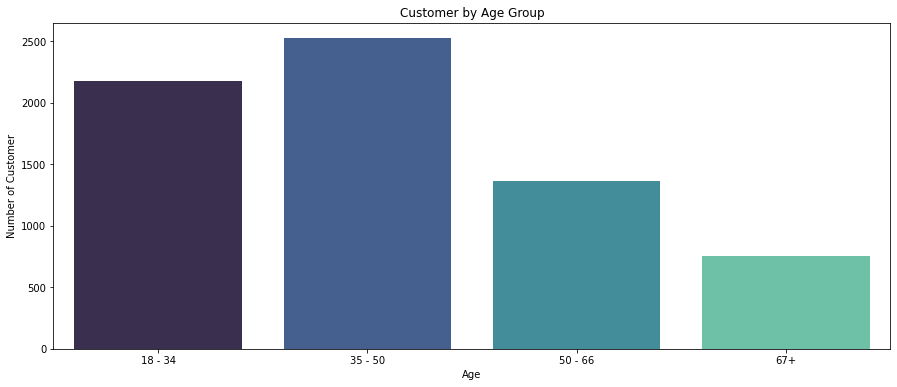

In [ ]:
agex = ['18 - 34', '35 - 50', '50 - 66', '67+']
agey = [len(age_18_34.value_counts()), len(age_35_50.value_counts()), len(age_50_66.value_counts()), len(age_67above.value_counts())]

plt.figure(figsize = (15, 6))
sns.barplot(x = agex, y = agey, palette='mako')
plt.title("Customer by Age Group")
plt.xlabel("Age")
plt.ylabel('Number of Customer')
plt.show()

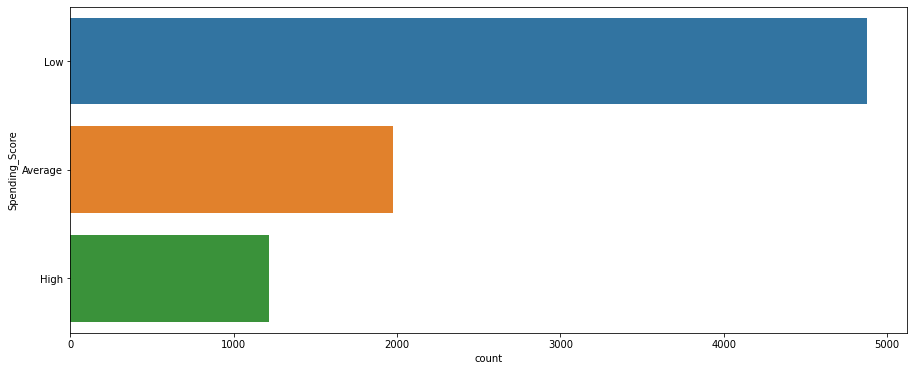

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(y='Spending_Score', data=df_segmentation)
plt.show()

In [ ]:
#Reassiging spending score with values 1, 2, 3 - High, Average, Low
df_segmentation.Spending_Score.replace({'High':1, 'Average':2, 'Low': 3}, inplace = True)

In [ ]:
ss1 = df_segmentation[df_segmentation['Spending_Score'] == 1]
ss2 = df_segmentation[df_segmentation['Spending_Score'] == 2]
ss3 = df_segmentation[df_segmentation['Spending_Score'] == 3]

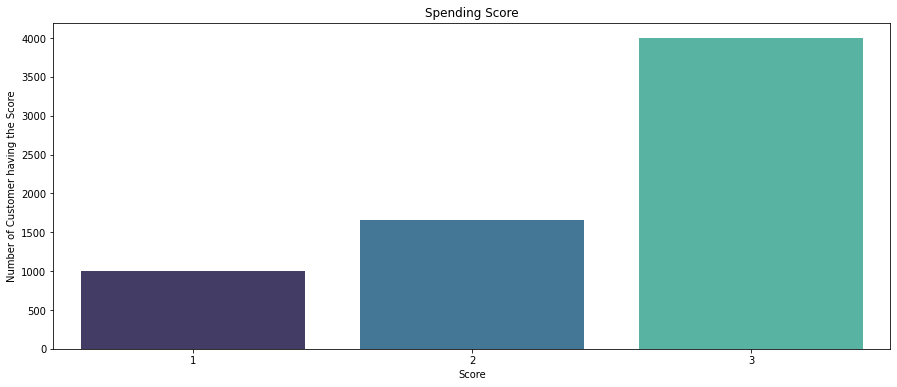

In [ ]:
ssx = ['1', '2', '3']
ssy = [len(ss1.value_counts()), len(ss2.value_counts()), len(ss3.value_counts())]

plt.figure(figsize = (15, 6))
sns.barplot(x = ssx, y = ssy, palette='mako')
plt.title("Spending Score")
plt.xlabel("Score")
plt.ylabel('Number of Customer having the Score')
plt.show()

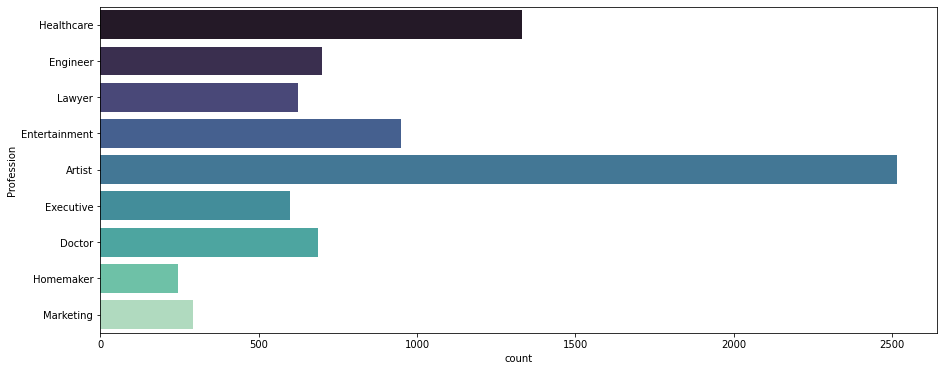

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(y='Profession', data=df_segmentation, palette = 'mako')
plt.show()

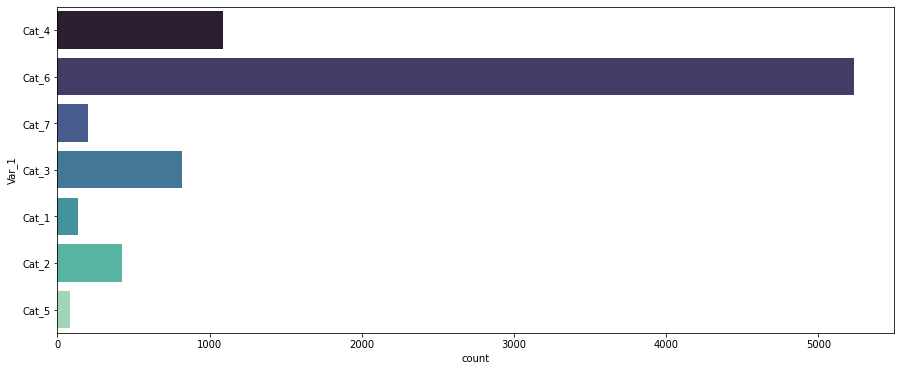

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(y='Var_1', data=df_segmentation, palette = 'mako')
plt.show()

In [ ]:
df_segmentation['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

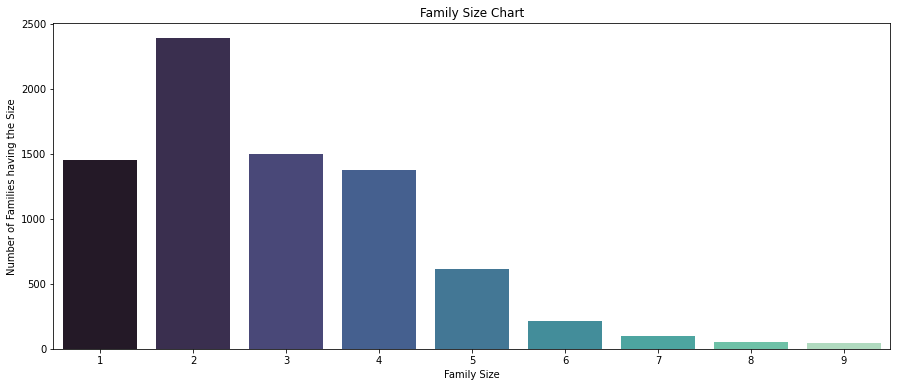

In [ ]:
family_size = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
size = [1453, 2390, 1497, 1379, 612, 212, 96, 50, 44]

plt.figure(figsize = (15, 6))
sns.barplot(x= family_size, y = size, palette='mako')
plt.title("Family Size Chart")
plt.xlabel("Family Size")
plt.ylabel('Number of Families having the Size')
plt.show()

End of Exploratory Data Analysis
Unto the next, which is data transformation and cleaning for ML training.

In [ ]:
#To convert the data into numerical data
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder()
encoder.fit(df_segmentation)

OrdinalEncoder()

In [ ]:
enco = encoder.transform(df_segmentation)

In [ ]:
import joblib

In [ ]:
joblib.dump(encoder, 'Encoder.pkl')

['Encoder.pkl']

In [ ]:
#Coversion to numerical representations done
segmentation = pd.DataFrame(enco, columns=df_segmentation.columns)
segmentation.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,3441.0,1.0,0.0,4.0,0.0,5.0,1.0,2.0,3.0,3.0,3.0
1,3292.0,0.0,1.0,18.0,1.0,2.0,NaN,1.0,2.0,3.0,0.0
2,6571.0,0.0,1.0,44.0,1.0,2.0,1.0,2.0,0.0,5.0,1.0
3,2469.0,1.0,1.0,44.0,1.0,7.0,0.0,0.0,1.0,5.0,1.0
4,3315.0,0.0,1.0,20.0,1.0,3.0,NaN,0.0,5.0,5.0,0.0


In [ ]:
#Dropping the ID Column because it is irrelevant
segmentation.drop('ID', axis = 1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1.0,0.0,4.0,0.0,5.0,1.0,2.0,3.0,3.0,3.0
1,0.0,1.0,18.0,1.0,2.0,NaN,1.0,2.0,3.0,0.0
2,0.0,1.0,44.0,1.0,2.0,1.0,2.0,0.0,5.0,1.0
3,1.0,1.0,44.0,1.0,7.0,0.0,0.0,1.0,5.0,1.0
4,0.0,1.0,20.0,1.0,3.0,NaN,0.0,5.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8063,1.0,0.0,4.0,0.0,NaN,0.0,2.0,6.0,0.0,3.0
8064,1.0,0.0,15.0,0.0,4.0,3.0,2.0,3.0,3.0,3.0
8065,0.0,0.0,14.0,1.0,5.0,1.0,2.0,0.0,5.0,3.0
8066,0.0,0.0,8.0,1.0,5.0,1.0,2.0,3.0,5.0,1.0


In [ ]:
#filling the NAN values with median as they've all been converted to numerical data
segmentation.fillna(segmentation.median(), inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = segmentation.drop(['Segmentation'], axis = 1)
Y = segmentation['Segmentation']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
from lightgbm import LGBMClassifier
model1 = LGBMClassifier(random_state = 0, n_estimators = 80)

In [ ]:
model1.fit(x_train, y_train)

LGBMClassifier(n_estimators=80, random_state=0)

In [ ]:
ypred = model1.predict(x_test)
ypred

array([3., 0., 3., ..., 3., 1., 2.])

In [ ]:
#To evaluate model accuracy
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         0.0       0.44      0.42      0.43       597
         1.0       0.46      0.37      0.41       552
         2.0       0.58      0.59      0.59       580
         3.0       0.63      0.76      0.69       692

    accuracy                           0.55      2421
   macro avg       0.53      0.53      0.53      2421
weighted avg       0.54      0.55      0.54      2421



In [ ]:
model1.booster_.save_model('LGBM.txt')